In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

##Data visualisation

In [62]:
df_1=pd.read_csv("winequality-red.csv",sep=";",encoding="latin-1")
df_1.head()
df_2=pd.read_csv("winequality-white.csv",sep=";",encoding="latin-1")
df_2.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


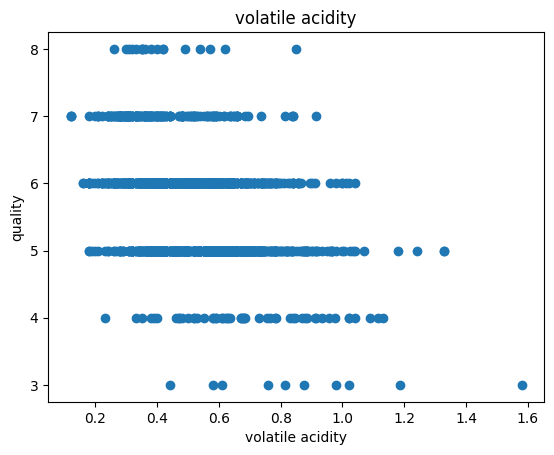

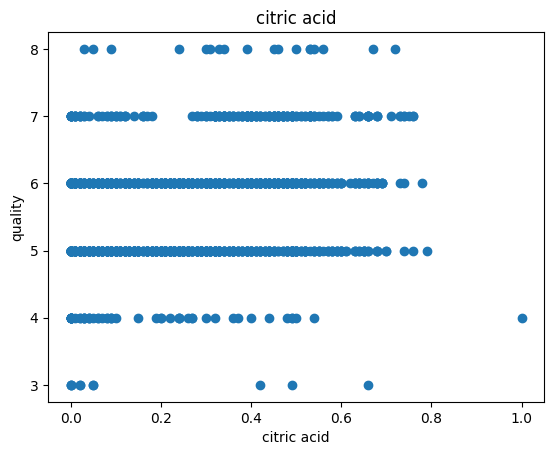

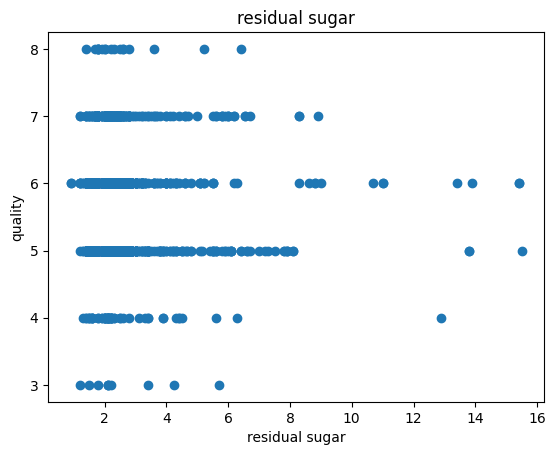

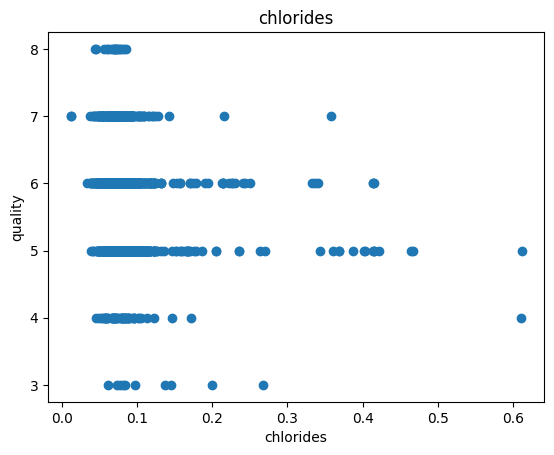

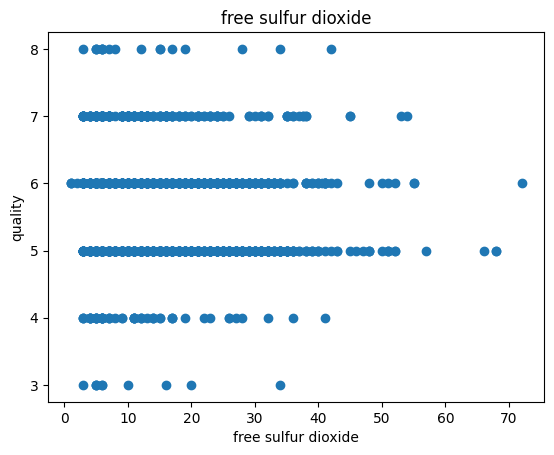

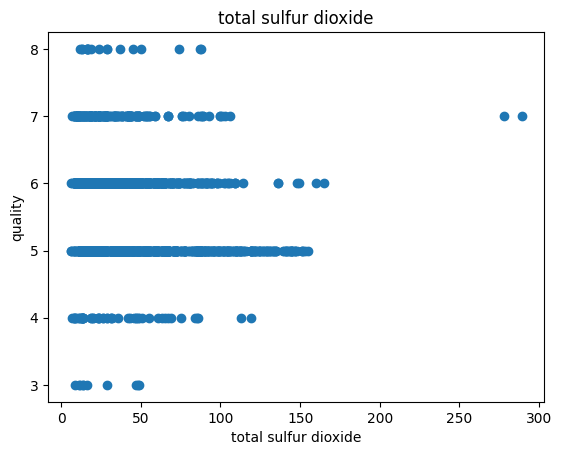

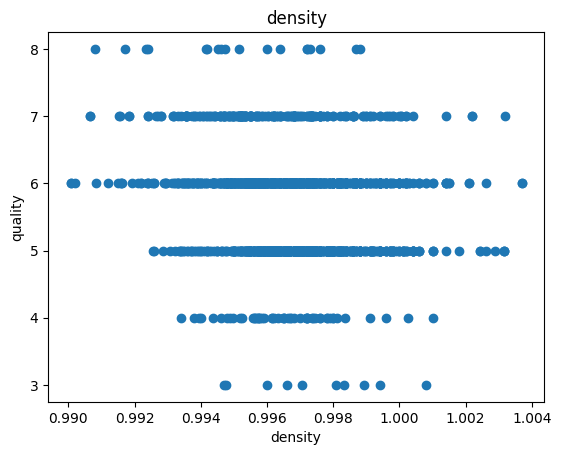

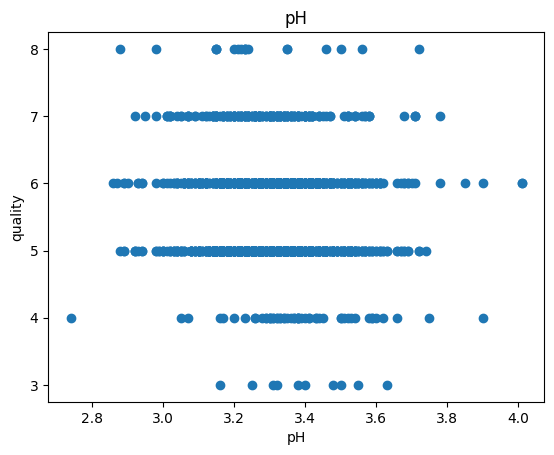

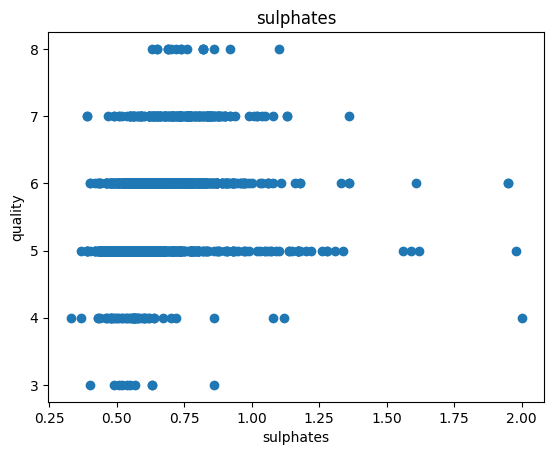

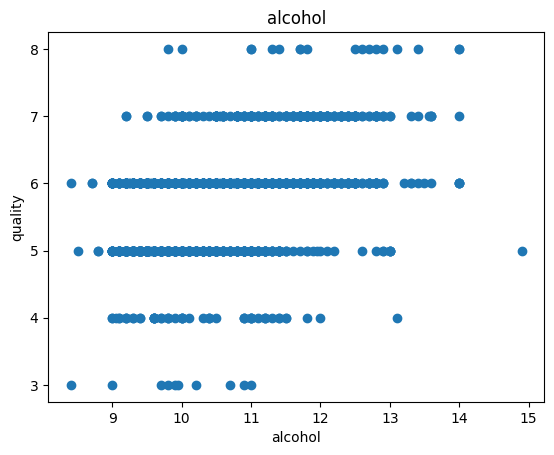

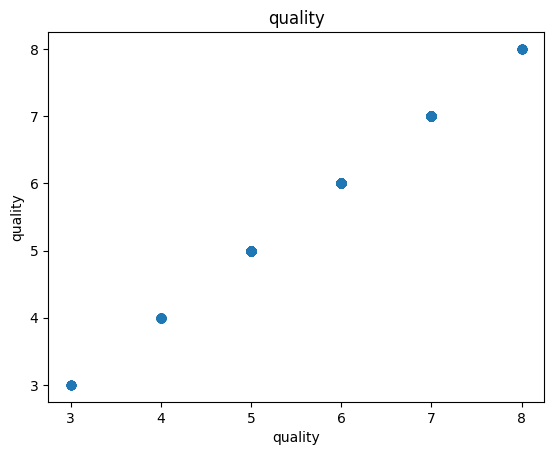

In [5]:
for label in df_1.columns[1:]:
  plt.scatter(df_1[label],df_1["quality"])
  plt.title(label)
  plt.ylabel("quality")
  plt.xlabel(label)
  plt.show()

##Implementation

In [86]:
def gradient_descent(X, y,k, learning_rate=0.01, n_iter=1000):    #return the coeff of the function that modelize the target

  n = len(y)
  X = np.array(X)
  y = np.array(y)

  n_features = X.shape[1] #number of xj
  W = np.zeros((k,n_features))
  b = np.zeros(k)
  losses=[]

  for iterations in range(n_iter):

    total_loss = 0

    for i in range(n):     #iterations on exemple
      x = X[i]       # n_features features vector
      label = y[i]    #integer 0,1,...,k-1

      s = W @ x + b    #matricial product (k*d)*(d*1) => k
      P = softmax(s)    #vector that store the probas

      loss = -np.log(P[y[i]])    #the more accurate the prediction is, the less the loss will be
      total_loss += loss

      grad_s = P
      grad_s[y[i]] -=1          #P(k) - 1(k = y)

      grad_W = np.outer(grad_s,x)  #compute all the (P[k] - 1{k=y})*xj at once
      grad_b = grad_s

      W = W - learning_rate*grad_W
      b = b - learning_rate*grad_b
    losses.append(total_loss/n)
  print("losses:", np.array(losses)/n)


  return W, b, losses

def softmax(s):
  s_1 = np.array(s) - np.max(s)
  s_2 = np.exp(s_1)
  return s_2/sum(s_2)

def y_pred(W, b, x):
  s = W @ x + b
  P = softmax(s)
  return np.argmax(P)


def split_data(df,target_name): # take the whole df and target's name and return the split data in an adapted form for the gradient_descent function
  df=copy.deepcopy(df)

  train, val = np.split(df.sample(frac=1),[int(0.8*len(df))]) #split at 0.6 of the df lenght and 0.8 of the df lenght

  df_1=train.drop([target_name],axis=1)
  X_train = df_1.values.tolist()         #list of list of the features for train
  y_train = train[target_name].tolist()   #list of target for train

  df_2=val.drop([target_name],axis=1)
  X_val = df_2.values.tolist()          #list of list of the features for val
  y_val = val[target_name].tolist()    #list of target for val

  #df_3=test.drop([target_name],axis=1)
  #X_test = df_3.values.tolist()          #list of list of the features for test
  #y_test = test[target_name].tolist()    #list of target for test

  return X_train,y_train,X_val,y_val

def scale_features(X):    #normalize features to avoid the gradient to diverge
    X = np.array(X)
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    return (X - means) / stds

def Linear_Regression(df,target_name,k,learning_rate,n_iter):      #return the coeff of the function
  X_train_1,y_train_1,X_val_1,y_val_1 = split_data(df,target_name)
  X_train,y_train,X_val,y_val = scale_features(X_train_1),y_train_1,scale_features(X_val_1),y_val_1

  W=[]
  losses = []
  W, b, losses = gradient_descent(X_train, y_train,k, learning_rate, n_iter)

  X_val = np.array(X_val)
  y_val = np.array(y_val)
  y_preds = np.zeros(len(y_val))
  for i in range(len(y_val)):
    y_preds[i] = y_pred(W,b,X_val[i])

  p = 0
  for i in range(len(y_val)):
    if y_val[i] == y_preds[i]:
      p=p+1
  accuracy=p/(len(y_val))

  return W, accuracy, losses

##Results (red wine)

In [69]:
W, accuracy = Linear_Regression(df_1,"quality",11,0.01,100)
print(W)
print(accuracy)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


losses: [0.00111197 0.00082984 0.00079093 0.00077485 0.0007656  0.00075939
 0.00075483 0.00075131 0.00074848 0.00074615 0.00074419 0.00074252
 0.00074107 0.00073981 0.0007387  0.00073771 0.00073682 0.00073603
 0.00073531 0.00073465 0.00073406 0.00073351 0.000733   0.00073254
 0.00073211 0.00073171 0.00073134 0.00073099 0.00073066 0.00073036
 0.00073007 0.0007298  0.00072955 0.00072931 0.00072908 0.00072887
 0.00072866 0.00072847 0.00072828 0.00072811 0.00072794 0.00072778
 0.00072763 0.00072749 0.00072735 0.00072722 0.00072709 0.00072697
 0.00072685 0.00072674 0.00072664 0.00072653 0.00072643 0.00072634
 0.00072625 0.00072616 0.00072607 0.00072599 0.00072591 0.00072584
 0.00072576 0.00072569 0.00072562 0.00072555 0.00072549 0.00072543
 0.00072537 0.00072531 0.00072525 0.0007252  0.00072514 0.00072509
 0.00072504 0.00072499 0.00072495 0.0007249  0.00072485 0.00072481
 0.00072477 0.00072473 0.00072469 0.00072465 0.00072461 0.00072457
 0.00072454 0.0007245  0.00072447 0.00072443 0.0007244

##Implementation using libraries

In [59]:
X_train_1,y_train_1,X_val_1,y_val_1 = split_data(df_1,"quality")
X_train,y_train,X_val,y_val = scale_features(X_train_1),y_train_1,scale_features(X_val_1),y_val_1

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

##Results (red wine)

In [61]:
y_pred = model.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.33      0.10      0.15        10
           5       0.66      0.78      0.71       132
           6       0.60      0.57      0.59       138
           7       0.43      0.35      0.39        34
           8       0.00      0.00      0.00         1

    accuracy                           0.61       320
   macro avg       0.34      0.30      0.31       320
weighted avg       0.58      0.61      0.59       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Results (white wine)

In [82]:
X_train_1,y_train_1,X_val_1,y_val_1 = split_data(df_2,"quality")
X_train,y_train,X_val,y_val = scale_features(X_train_1),y_train_1,scale_features(X_val_1),y_val_1

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.67      0.05      0.10        38
           5       0.62      0.48      0.54       324
           6       0.50      0.81      0.62       414
           7       0.60      0.22      0.32       162
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.54       980
   macro avg       0.34      0.22      0.22       980
weighted avg       0.54      0.54      0.50       980



/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wit

In [87]:
W, accuracy,losses = Linear_Regression(df_2,"quality",11,0.01,100)
print(W)
print(accuracy)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


losses: [0.00033864 0.00029295 0.00028811 0.00028608 0.00028495 0.00028424
 0.00028374 0.00028337 0.00028307 0.00028283 0.00028263 0.00028246
 0.00028231 0.00028217 0.00028206 0.00028195 0.00028186 0.00028177
 0.00028169 0.00028162 0.00028156 0.0002815  0.00028144 0.00028139
 0.00028134 0.00028129 0.00028125 0.00028121 0.00028117 0.00028114
 0.00028111 0.00028107 0.00028104 0.00028102 0.00028099 0.00028096
 0.00028094 0.00028091 0.00028089 0.00028087 0.00028085 0.00028083
 0.00028081 0.00028079 0.00028078 0.00028076 0.00028074 0.00028073
 0.00028071 0.0002807  0.00028069 0.00028067 0.00028066 0.00028065
 0.00028064 0.00028063 0.00028061 0.0002806  0.00028059 0.00028058
 0.00028057 0.00028056 0.00028055 0.00028055 0.00028054 0.00028053
 0.00028052 0.00028051 0.00028051 0.0002805  0.00028049 0.00028048
 0.00028048 0.00028047 0.00028046 0.00028046 0.00028045 0.00028045
 0.00028044 0.00028043 0.00028043 0.00028042 0.00028042 0.00028041
 0.00028041 0.0002804  0.0002804  0.00028039 0.0002803

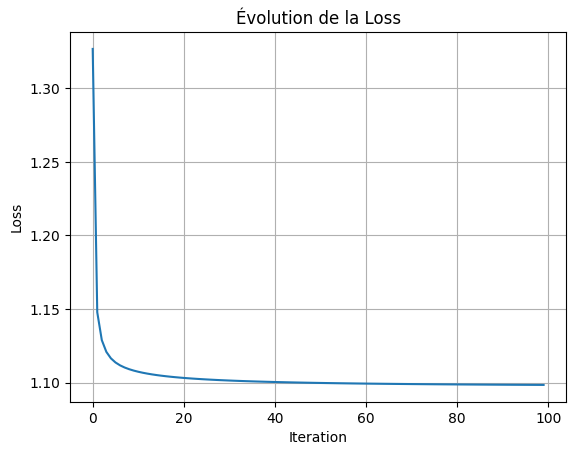

In [88]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Évolution de la Loss")
plt.grid(True)
plt.show()